In [ ]:
from util import fisherztrans,stat_m_e,pair_test,sig,color_inv_alpha
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import seaborn as sns
from faceprf_figure_function import set_figure,set_ax,myviolinplot_ind,myviolinplot_pair,myviolinplot_multi
import pingouin
import mat73

nsubj = 8
npos = 16
task = ['Digit Task','Face Task']
ntask = len(task)
cms=np.array([[255, 195, 73],[145, 115, 185]])/255

data_path = "../data/"

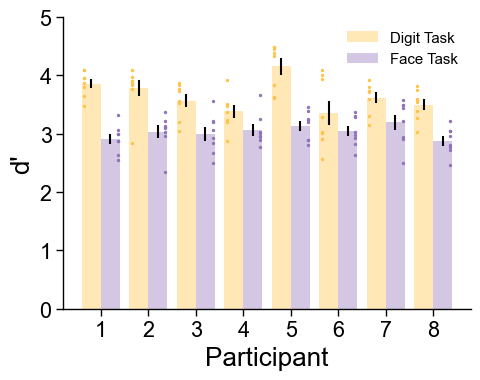

In [66]:
data = np.array(mat73.loadmat(data_path+'behperf_faceprf.mat')['behperf_all']['dprime'])
data_mean = np.array([np.nanmean(data[:,:,::2],axis=2),np.nanmean(data[:,:,1::2],axis=2)])
set_figure()
f,ax = plt.subplots(figsize=(5,4))
ax.bar(np.arange(1,9,1)-0.2,np.mean(data_mean[1,:,:],axis=1),color=cms[0],width=0.4,alpha=0.4)
ax.bar(np.arange(1,9,1)+0.2,np.mean(data_mean[0,:,:],axis=1),color=cms[1],width=0.4,alpha=0.4)
ax.legend(task, frameon=False, fontsize='small')
ax.errorbar(np.arange(1,9,1)-0.2,np.mean(data_mean[1,:,:],axis=1),stats.sem(data_mean[1,:,:],axis=1),color='k',linestyle='',linewidth=1.5)
ax.errorbar(np.arange(1,9,1)+0.2,np.mean(data_mean[0,:,:],axis=1),stats.sem(data_mean[0,:,:],axis=1),color='k',linestyle='',linewidth=1.5)
for i in range(nsubj):
    ax.scatter(np.ones(8)*i+1-0.35,data_mean[1,i,:],s=2,color=cms[0])
    ax.scatter(np.ones(8)*i+1+0.35,data_mean[0,i,:],s=2,color=cms[1])
ax.set_ylabel("d'")
ax.set_xlabel("Participant")
ax.set_xticks(np.arange(1,9,1));
ax.set_ylim([0,5])
f.savefig('figS6-dprime.pdf', bbox_inches='tight')
